In [2]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage
import os

In [3]:
def names(cont):    
    folder = "D:/SkinCancerDatasets/ISIC/images_separate_type/melanoma/"    # folder path
    files_names = os.listdir(folder)        # get all files names
    name = folder + files_names[cont]       # get image name
    short_name = files_names[cont]          # get image short name
    return name, short_name

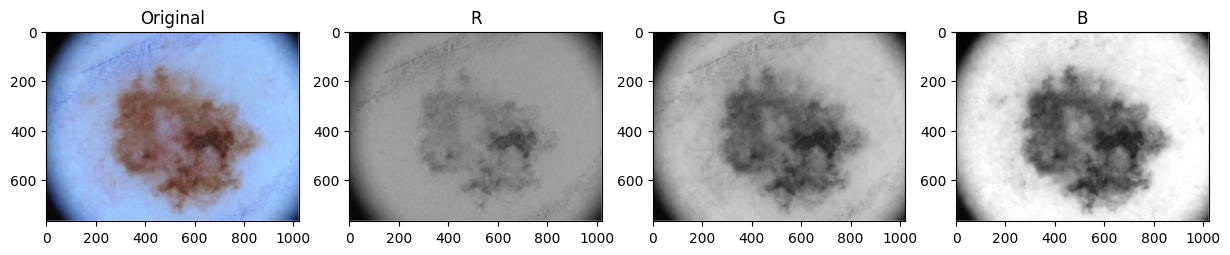

In [21]:
image = cv.imread(names(0)[0])
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
r,g,b = cv.split(image)

figure = plt.figure(figsize=(15,15))

plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(image)

plt.subplot(1,4,2)
plt.title('R')
plt.imshow(r, cmap='gray')

plt.subplot(1,4,3)
plt.title('G')
plt.imshow(g, cmap='gray')

plt.subplot(1,4,4)
plt.title('B')
plt.imshow(b, cmap='gray')


plt.show()

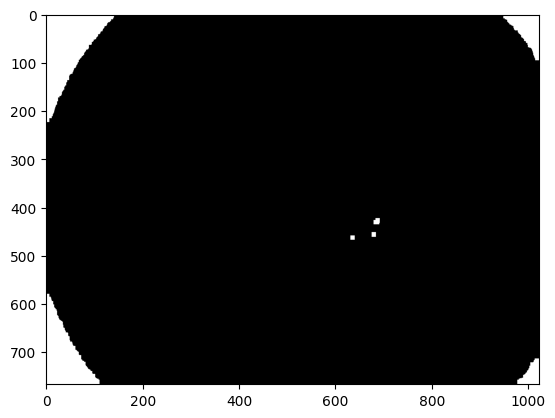

In [65]:
_,border_treshold = cv.threshold(r,50,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)  # Kernel 5x5 de unos

# Aplicamos la dilatación
dilated_image = cv.dilate(border_treshold, kernel, iterations=2)
plt.imshow(dilated_image,cmap='gray')
plt.show()

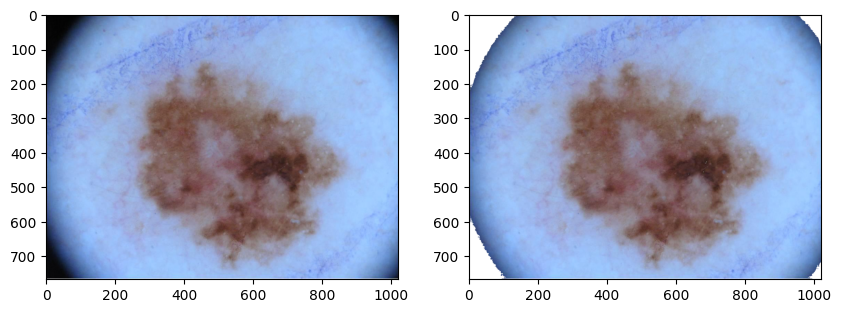

In [55]:
new_img = image.copy()
for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        if border_treshold[i,j] == 255:
            new_img[i,j,0] = 255
            new_img[i,j,1] = 255
            new_img[i,j,2] = 255

figure = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()